**Task 4: Generate Descriptive Statistics and Visualizations**

In [ ]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
## Import Data
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

*For the "Median value of owner-occupied homes" provide a boxplot*

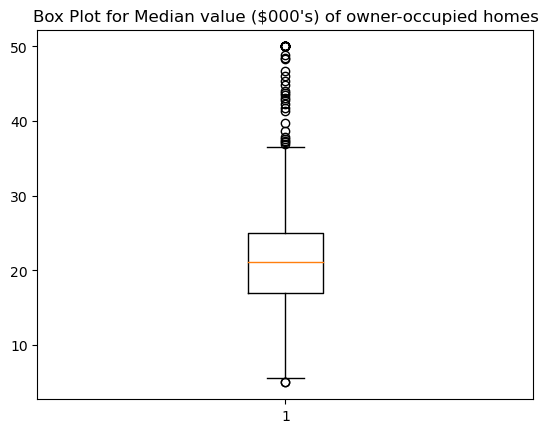

In [3]:
## For the "Median value of owner-occupied homes" provide a boxplot
plt.boxplot(boston_df.MEDV)
# Adding title 
plt.title("Box Plot for Median value ($000's) of owner-occupied homes")
plt.show()

*bar plot for the Charles river variable*

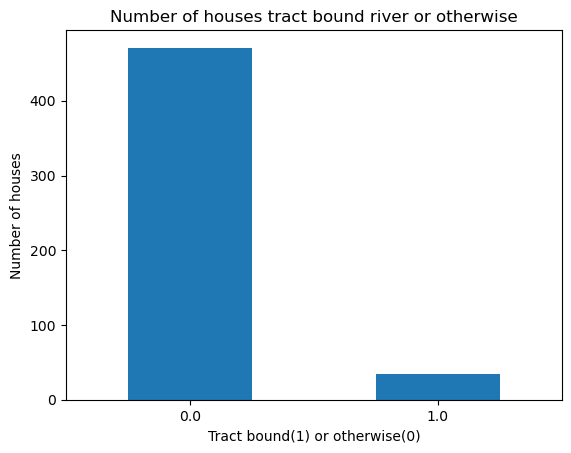

In [4]:
## bar plot for the Charles river variable
boston_df['CHAS'].value_counts().plot.bar(rot=0)
plt.title("Number of houses tract bound river or otherwise")
#bar.show()
plt.ylabel("Number of houses")
plt.xlabel("Tract bound(1) or otherwise(0)")
plt.show()


*Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)*

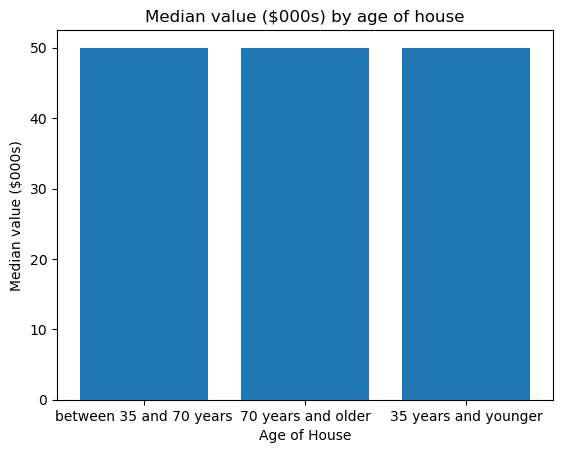

In [5]:
## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

interval_range = pd.interval_range(start=0, freq=35,end=105)
labels=['35 years and younger','between 35 and 70 years','70 years and older']
boston_df['age_bin'] = pd.cut(boston_df['AGE'], bins=interval_range)
boston_df['age_bin']  = boston_df['age_bin'].map(dict(zip(interval_range,labels)))

plt.bar(boston_df.age_bin,boston_df.MEDV)
plt.title("Median value ($000s) by age of house") # title
plt.xlabel("Age of House") #xlabel
plt.ylabel("Median value ($000s)") #ylabel
plt.show()

*relation between Nitric oxide concentration and the proportion of non-retail business acres per town*

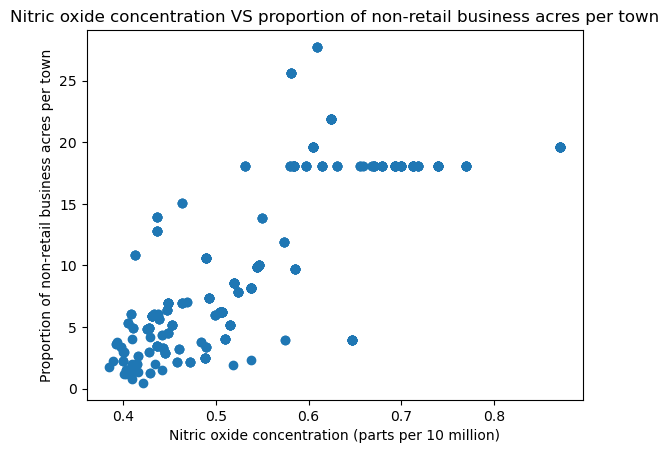

In [6]:
## relation between Nitric oxide concentration and the proportion of non-retail business acres per town

plt.scatter(boston_df.NOX,boston_df.INDUS)
plt.title("Nitric oxide concentration VS proportion of non-retail business acres per town")
plt.xlabel("Nitric oxide concentration (parts per 10 million)")
plt.ylabel("Proportion of non-retail business acres per town")
plt.show() 
# We can see from the plot that higher the Nitric oxide concentration, higher is the non-retail proprtion of land in a town which indicates more emmission

*Create a histogram for the pupil to teacher ratio variable*

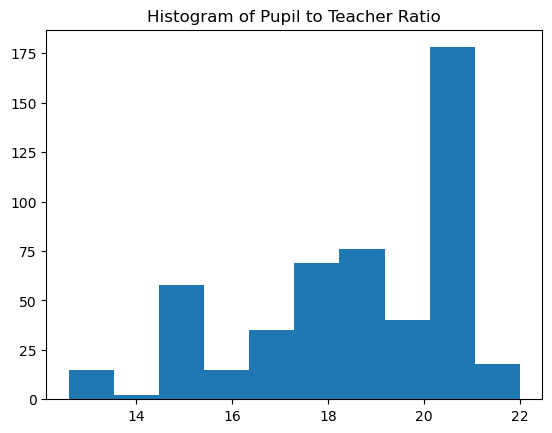

In [7]:
# Create a histogram for the pupil to teacher ratio variable

plt.hist(boston_df.PTRATIO)
plt.title("Histogram of Pupil to Teacher Ratio")
plt.show()

**Task 5: Use the appropriate tests to answer the questions provided.**

*Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)*

* H0: there is no difference in mdeian values of houses on the tract of Charles river or away

* H1: there is no difference in mdeian values of houses on the tract of Charles river or away

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

***Conclusion**: Since pvalue less than 0.05, we can reject the null hypothesis (H0). Hence, there is significant difference in median values of house if the house is situated on tract of Charles river or not*

*Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?*

* H0: Equal variance across groups

* H1: Unequal variance across groups

First, separate the three samples (one for each job category) into a variable each.

In [16]:
# '35 years and younger','between 35 and 70 years','70 years and older'
lower_35 = boston_df[boston_df['age_bin'] == '35 years and younger']['MEDV']
between_35_70 = boston_df[boston_df['age_bin'] == 'between 35 and 70 years']['MEDV']
older_70 = boston_df[boston_df['age_bin'] == '70 years and older']['MEDV']

Now, run a one-way ANOVA.

In [17]:
f_statistic, p_value = scipy.stats.f_oneway(lower_35, between_35_70, older_70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


***Conclusion**: Since P-value is less than alpha of 0.05, we reject the null hupothesis of equal variance and conclude that the Median value differs by Age of the building*

*Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)*

* H0: Nitric oxide concentration is not correlated to non-retial business acres per town

* H1: Nitric oxide concentration is correlated to non-retial business acres per town
    

In [18]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

***Conclusion*: Since the P-value is less than alpha (0.05), we reject the null hypothesis and conclude that there is correlation between Nitric Oxide conentration with the acres of non-retail business*

*What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?*


*   $H\_0: β1$ = 0 (Weighted distance  to the five Boston employment centres has no effect on the median value of owner occupied homes)
*   $H\_1: β1$ is not equal to 0 (Weighted distance  to the five Boston employment centres has an effect on the median value of owner occupied homes)

In [22]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 02 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        20:05:47   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Conclusion**: As the P-value of coefficient for DIS is less than 0.05, we reject the null hypothesis and conclude that there is an impact of distance to business centre  on the housingprice.*